# Project Info and Resources
## Introduction
- Goal: Predict future Euro-Dollar (EUR/USD) price. <br>
Can check the tomorrow's price, or 7 days in advance, etc. <br>
- 2 popular models for forecasting future prices
 - Random Forests
 - LSTM (neural network)
- 2 ways to achieve this
 - Classifier approach (predict if price goes up or down)
   - (George Preferred)
 - Regresssion approach (predict the actual future price)
- Data to use
 - EUR/USD closing prices
 - US treasury 5 and 10 year yield percentages
 - ECB (European Central Bank) 10 year yield percentages
 - US Inflation rates
 - US Dollar Index (DXY)
 - Technical indicators (RSI, Bollinger, etc..) derived from closing prices
   - This needs to be done through code
- How to start
 - Look over some of the articles to get a feel for what a random forest is and comparing it to LSTM
 - Check out the O'Reilly book Chapter 11
 - We need to have one single Pandas dataframe with the dates on the left and all features on the right.


## Resources

### Articles / Videos
Exchange Rate Prediction: Machine Learning with 5 Regression Models (Nikita's find) <br>
https://towardsdatascience.com/exchange-rate-prediction-machine-learning-with-5-regression-models-d7a3192531d <br>
FX Algorithmic Trading with Machine Learning models <br>
https://medium.com/@nusfintech.ml/fx-algorithmic-trading-with-machine-learning-models-7d6821fa7e67 <br>
Which is the real money maker, Random Forest regressors or LSTM Networks? <br>
https://medium.com/@nusfintech.ml/which-is-the-real-money-maker-random-forest-regressors-or-lstm-networks-a2153c0f8e92 <br>
Predict Stock Prices Using Random Forest Regression Model in Python <br>
https://medium.com/@maryamuzakariya/project-predict-stock-prices-using-random-forest-regression-model-in-python-fbe4edf01664 <br>
Data Scientist turning Quant (II) — Let’s Predict Stock Move Directions <br>
https://jonas-schroeder.medium.com/data-scientist-turning-quant-ii-lets-predict-stock-move-directions-e5cd71fc9c68 <br>
Understand Random Forest Algorithms With Examples (Updated 2023) <br>
https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/ <br>

How to use the YFinance Python Library <br>
https://www.qmr.ai/yfinance-library-the-definitive-guide/
<br><br>
Github repo with Forex Prediction code, a lot of classification. <br>
https://github.com/penguinwang96825/Forex-Predictor <br>

### Book
Machine Learning for Algorithmic Trading - Second Edition (Chapter 11)<br>
(Freely available to students from O'Reilly Learning) <br>
(Extremely useful information on properly doing the modeling, errors etc)
### Data Sources (to be updated)
https://finance.yahoo.com/quote/BTC-USD?p=BTC-USD&.tsrc=fin-srch <br><br>
https://sdw.ecb.europa.eu/quickviewexport.do?SERIES_KEY=165.YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_10Y&type=xls <br><br>
https://www.usinflationcalculator.com/inflation/historical-inflation-rates/ <br><br>
https://ycharts.com/indicators/us_inflation_rate
<br><br>


# 412 Info
### Important Dates:
April 27 - Our oral presentation in class <br>
May 8    - Final report due

### Points (Total 100)
- Project Proposal (20 pts)
- Oral Presentation (20 pts)
- Final Report (60 pts)


### Final Report
- Use Latex or WORD template from https://www.cs.uic.edu/~zhangx/teaching/Report_Template.zip
- Max number of pages: eight (8), including figures and tables but excluding references.
- One additional ninth page containing only the cited references is allowed.
- At least 4 pages (excluding reference) recommended
- Summary of problem, approach, evaluation, results
- What did you learn from this project?
- **No code needs to be submitted**

### 01 - Import necessary libraries

In [1]:
import yfinance as yf
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This library is used to getting the technical indicators.
# Used to build features.
!pip install pandas_ta
import pandas_ta as ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=004998d13963006c5d2fb2b229a4618d76a44a7df86cea4d9c6310cff89d938d
  Stored in directory: /root/.cache/pip/wheels/1e/5c/47/759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta


### 02 - Collecting historical EUR/USD closing prices since 2005

In [2]:
eurusd = yf.Ticker("EURUSD=X")
#end_date = datetime.now().strftime('%Y-%m-%d')
end_date = '2023-04-21'
eurusd_hist = eurusd.history(start='2005-01-01', end=end_date)
eurusd_hist = eurusd_hist.iloc[:, 3:4]
eurusd_hist.index = eurusd_hist.index.date


# x = eurusd_hist.index.values

# y = ( eurusd_hist['High'] + eurusd_hist['Low'] ) / 2
# x = x[0:4601]
# y = y[0:4601]
# plt.figure(figsize=(8,4))
# plt.plot(x, y)
# plt.title("Exchange Rate: EUR/USD")
# plt.xlabel("Month")
# plt.ylabel("Exchange Rate")
# plt.show()

eurusd_hist["rsi"] = ta.rsi(close = eurusd_hist["Close"])
eurusd_hist["sma_10"] = ta.sma(eurusd_hist["Close"], length=10)
eurusd_hist["sma_20"] = ta.sma(eurusd_hist["Close"], length=20)
eurusd_hist["cross"] = ta.cross(eurusd_hist["sma_10"], eurusd_hist["sma_20"])

# returns pd.DataFrame: lower, mid, upper, bandwidth, and percent columns.
bbands = ta.bbands(close = eurusd_hist["Close"])

# returns pd.DataFrame: macd, histogram, signal columns.
macd = ta.macd(close=eurusd_hist["Close"])

# returns pd.DataFrame: RSI %K, RSI %D columns.
stoch_rsi = ta.stochrsi(close=eurusd_hist["Close"])

eurusd_hist = eurusd_hist.join(macd).join(bbands).join(stoch_rsi)
eurusd_hist




,Close,rsi,sma_10,sma_20,cross,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
2005-01-03,1.347001,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,1.328198,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,1.328004,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06,1.318305,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07,1.306097,NaN,NaN,NaN,0,NaN,NaN,NaN,1.298627,1.325521,1.352414,4.057838,0.138876,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14,1.105461,65.794414,1.092541,1.086524,0,0.007220,0.001300,0.005919,1.081736,1.095098,1.108460,2.440324,0.887770,81.186213,55.635681
2023-04-17,1.098660,59.745408,1.094374,1.088063,0,0.007230,0.001049,0.006181,1.083560,1.096559,1.109557,2.370800,0.580815,82.119727,71.346314
2023-04-18,1.092538,54.856839,1.094505,1.089094,0,0.006668,0.000389,0.006279,1.087543,1.097680,1.107816,1.846866,0.246374,50.718319,71.341419
2023-04-19,1.097538,57.887880,1.094657,1.090100,0,0.006550,0.000217,0.006333,1.090514,1.098837,1.107161,1.514961,0.421971,27.779784,53.539276


### 03 - Collecting historical 10 Year US Treasury Yield

In [3]:
# US 10 Year US Treasury Yield
ten_yr = yf.Ticker("^TNX")
end_date = datetime.now().strftime('%Y-%m-%d')
ten_yr_hist = ten_yr.history(start='2005-01-03', end=end_date)
ten_yr_hist.rename(columns={'Close':'10_yr_yield'}, inplace = True)
ten_yr_hist.index = ten_yr_hist.index.date
eurusd_hist = eurusd_hist.join(ten_yr_hist['10_yr_yield'])
eurusd_hist

,Close,rsi,sma_10,sma_20,cross,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,10_yr_yield
2005-01-03,1.347001,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.220
2005-01-04,1.328198,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.283
2005-01-05,1.328004,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.277
2005-01-06,1.318305,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.272
2005-01-07,1.306097,NaN,NaN,NaN,0,NaN,NaN,NaN,1.298627,1.325521,1.352414,4.057838,0.138876,NaN,NaN,4.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14,1.105461,65.794414,1.092541,1.086524,0,0.007220,0.001300,0.005919,1.081736,1.095098,1.108460,2.440324,0.887770,81.186213,55.635681,3.522
2023-04-17,1.098660,59.745408,1.094374,1.088063,0,0.007230,0.001049,0.006181,1.083560,1.096559,1.109557,2.370800,0.580815,82.119727,71.346314,3.591
2023-04-18,1.092538,54.856839,1.094505,1.089094,0,0.006668,0.000389,0.006279,1.087543,1.097680,1.107816,1.846866,0.246374,50.718319,71.341419,3.572
2023-04-19,1.097538,57.887880,1.094657,1.090100,0,0.006550,0.000217,0.006333,1.090514,1.098837,1.107161,1.514961,0.421971,27.779784,53.539276,3.602


### 04 - Method to collect it all with one call to Yahoo Finance

In [4]:
symbols = ['EURUSD=X', '^TNX', '^FVX', 'DX-Y.NYB']
tickers = yf.Tickers(symbols)
tickers_hist = tickers.history(start='2005-01-01', end=end_date, interval='1d')
tickers_hist['Close']

[*********************100%***********************]  4 of 4 completed


,DX-Y.NYB,EURUSD=X,^FVX,^TNX
Date,,,,
2005-01-03,81.300003,1.347001,3.628,4.220
2005-01-04,82.570000,1.328198,3.705,4.283
2005-01-05,82.540001,1.328004,3.711,4.277
2005-01-06,83.150002,1.318305,3.695,4.272
2005-01-07,83.610001,1.306097,3.725,4.285
...,...,...,...,...
2023-04-20,101.839996,1.095218,3.640,3.545
2023-04-21,101.820000,1.097093,3.661,3.570
2023-04-24,101.349998,1.099227,3.605,3.515


### 05 - Add the 5 year US bond yield and DXY

In [5]:
tickers_hist['Close', 'EURUSD=X']
eurusd_hist['5_yr_yield'] = tickers_hist['Close', '^FVX']
eurusd_hist['DXY_Close'] = tickers_hist['Close', 'DX-Y.NYB']
eurusd_hist

,Close,rsi,sma_10,sma_20,cross,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,10_yr_yield,5_yr_yield,DXY_Close
2005-01-03,1.347001,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.220,3.628,81.300003
2005-01-04,1.328198,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.283,3.705,82.570000
2005-01-05,1.328004,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.277,3.711,82.540001
2005-01-06,1.318305,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.272,3.695,83.150002
2005-01-07,1.306097,NaN,NaN,NaN,0,NaN,NaN,NaN,1.298627,1.325521,1.352414,4.057838,0.138876,NaN,NaN,4.285,3.725,83.610001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14,1.105461,65.794414,1.092541,1.086524,0,0.007220,0.001300,0.005919,1.081736,1.095098,1.108460,2.440324,0.887770,81.186213,55.635681,3.522,3.611,101.550003
2023-04-17,1.098660,59.745408,1.094374,1.088063,0,0.007230,0.001049,0.006181,1.083560,1.096559,1.109557,2.370800,0.580815,82.119727,71.346314,3.591,3.693,102.099998
2023-04-18,1.092538,54.856839,1.094505,1.089094,0,0.006668,0.000389,0.006279,1.087543,1.097680,1.107816,1.846866,0.246374,50.718319,71.341419,3.572,3.675,101.750000
2023-04-19,1.097538,57.887880,1.094657,1.090100,0,0.006550,0.000217,0.006333,1.090514,1.098837,1.107161,1.514961,0.421971,27.779784,53.539276,3.602,3.722,101.970001


### 06 - Add the ECB 10 year yield

In [6]:
ecb_url = 'https://sdw.ecb.europa.eu/quickviewexport.do?SERIES_KEY=165.YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_10Y&type=xls'
euro_10_yr_yield = pd.read_csv(ecb_url, header=None, skiprows=6, on_bad_lines='warn', usecols=[0, 1])
euro_10_yr_yield.columns = ['Date', 'eur_10_yr_yield']

euro_10_yr_yield['Date'] = pd.to_datetime(euro_10_yr_yield.Date, format="%Y-%m-%d")

# euro_10_yr_yield = euro_10_yr_yield[0:4601]  # same order
euro_10_yr_yield = euro_10_yr_yield[(euro_10_yr_yield['Date'].dt.year >= 2005) ][0:4601].set_index('Date')
euro_10_yr_yield.index = euro_10_yr_yield.index.date

euro_10_yr_yield[::-1]['eur_10_yr_yield']

if 'eur_10_yr_yield' not in eurusd_hist:
  eurusd_hist = eurusd_hist.join(euro_10_yr_yield[::-1]['eur_10_yr_yield'])
eurusd_hist

,Close,rsi,sma_10,sma_20,cross,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,10_yr_yield,5_yr_yield,DXY_Close,eur_10_yr_yield
2005-01-03,1.347001,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.220,3.628,81.300003,NaN
2005-01-04,1.328198,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.283,3.705,82.570000,NaN
2005-01-05,1.328004,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.277,3.711,82.540001,NaN
2005-01-06,1.318305,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.272,3.695,83.150002,NaN
2005-01-07,1.306097,NaN,NaN,NaN,0,NaN,NaN,NaN,1.298627,1.325521,1.352414,4.057838,0.138876,NaN,NaN,4.285,3.725,83.610001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14,1.105461,65.794414,1.092541,1.086524,0,0.007220,0.001300,0.005919,1.081736,1.095098,1.108460,2.440324,0.887770,81.186213,55.635681,3.522,3.611,101.550003,2.472042
2023-04-17,1.098660,59.745408,1.094374,1.088063,0,0.007230,0.001049,0.006181,1.083560,1.096559,1.109557,2.370800,0.580815,82.119727,71.346314,3.591,3.693,102.099998,2.547712
2023-04-18,1.092538,54.856839,1.094505,1.089094,0,0.006668,0.000389,0.006279,1.087543,1.097680,1.107816,1.846866,0.246374,50.718319,71.341419,3.572,3.675,101.750000,2.551099
2023-04-19,1.097538,57.887880,1.094657,1.090100,0,0.006550,0.000217,0.006333,1.090514,1.098837,1.107161,1.514961,0.421971,27.779784,53.539276,3.602,3.722,101.970001,2.590686


### 07 - US Inflation Rate Data
https://www.usinflationcalculator.com/inflation/historical-inflation-rates/

In [7]:
tables = pd.read_html('https://www.usinflationcalculator.com/inflation/historical-inflation-rates/')
tables = tables[0][90:]

monthly_tables = tables.melt(id_vars=['Year'], value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],var_name='Month',
                    value_name='rate')

# month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_tables['Month'] = pd.Categorical(monthly_tables['Month'], categories=month_order, ordered=True)

monthly_tables.sort_values(['Year', 'Month'], ascending=[True, True], inplace=True)


def expand_month(row, days):
    date_range = pd.date_range(start=f"{row['Year']}-{row['Month']}-01", periods=days, freq='D')
    df = pd.DataFrame({'Year': date_range.year,
                       'Month': date_range.strftime('%b'),
                       'Day': date_range.day,
                       'Price': row['Price']})
    return df

#print(tables)
monthly_tables

,Year,Month,rate
0,2004,Jan,1.9
20,2004,Feb,1.7
40,2004,Mar,1.7
60,2004,Apr,2.3
80,2004,May,3.1
...,...,...,...
159,2023,Aug,NaN
179,2023,Sep,NaN
199,2023,Oct,NaN
219,2023,Nov,NaN


### 08 - Add US inflation data

In [8]:
inflation_data = []
for row in tables.iterrows():
  row_data = row[1].tolist()
  year = str(row_data[0])

  for i in range(1, 13):
    if (str(row_data[i]).replace(".", "").isnumeric()):
      dash = '-0' if i < 10 else '-'
      date = str(year+dash + str(i) + '-01')
      inflation_data.append([date, float(row_data[i])])

inflation_df = pd.DataFrame(inflation_data, columns=['Date', 'us_inf'])
inflation_df = inflation_df.set_index('Date')
inflation_df.index = pd.to_datetime(inflation_df.index)

if 'us_inf' not in eurusd_hist:
  eurusd_hist = eurusd_hist.join(inflation_df)
eurusd_hist = eurusd_hist.ffill(axis = 0)
eurusd_hist

,Close,rsi,sma_10,sma_20,cross,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,10_yr_yield,5_yr_yield,DXY_Close,eur_10_yr_yield,us_inf
2005-01-03,1.347001,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.220,3.628,81.300003,NaN,NaN
2005-01-04,1.328198,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.283,3.705,82.570000,NaN,NaN
2005-01-05,1.328004,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.277,3.711,82.540001,NaN,NaN
2005-01-06,1.318305,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.272,3.695,83.150002,NaN,NaN
2005-01-07,1.306097,NaN,NaN,NaN,0,NaN,NaN,NaN,1.298627,1.325521,1.352414,4.057838,0.138876,NaN,NaN,4.285,3.725,83.610001,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14,1.105461,65.794414,1.092541,1.086524,0,0.007220,0.001300,0.005919,1.081736,1.095098,1.108460,2.440324,0.887770,81.186213,55.635681,3.522,3.611,101.550003,2.472042,5.0
2023-04-17,1.098660,59.745408,1.094374,1.088063,0,0.007230,0.001049,0.006181,1.083560,1.096559,1.109557,2.370800,0.580815,82.119727,71.346314,3.591,3.693,102.099998,2.547712,5.0
2023-04-18,1.092538,54.856839,1.094505,1.089094,0,0.006668,0.000389,0.006279,1.087543,1.097680,1.107816,1.846866,0.246374,50.718319,71.341419,3.572,3.675,101.750000,2.551099,5.0
2023-04-19,1.097538,57.887880,1.094657,1.090100,0,0.006550,0.000217,0.006333,1.090514,1.098837,1.107161,1.514961,0.421971,27.779784,53.539276,3.602,3.722,101.970001,2.590686,5.0


### 09 - Add Euro area inflation data

In [9]:
euro_inf = pd.read_html('https://www.rateinflation.com/inflation-rate/euro-area-historical-inflation-rate/')
# Reverse the ordering, oldest data first, newest last.
euro_inf = euro_inf[0][::-1]

# Strip out the percent symbols
columns = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'Annual']
for column in columns:
  euro_inf[column] = euro_inf[column].str.rstrip('%')

euro_inf = euro_inf[:-1]

euro_inf_data = []
for row in euro_inf.iterrows():
  row_data = row[1].tolist()
  year = str(row_data[0])

  for i in range(1, 13):
    if (str(row_data[i]).replace(".", "").isnumeric()):
      dash = '-0' if i < 10 else '-'
      date = str(year+dash + str(i) + '-01')
      euro_inf_data.append([date, float(row_data[i])])

euro_inf_df = pd.DataFrame(euro_inf_data, columns=['Date', 'euro_inf'])
euro_inf_df = euro_inf_df.set_index('Date')
euro_inf_df.index = pd.to_datetime(euro_inf_df.index)

if 'euro_inf' not in eurusd_hist:
  eurusd_hist = eurusd_hist.join(euro_inf_df).ffill(axis = 0)
if 'inflation_diff' not in eurusd_hist:
  eurusd_hist['inflation_diff'] = eurusd_hist['us_inf'] - eurusd_hist['euro_inf']
eurusd_hist = eurusd_hist[82:]
print(eurusd_hist['eur_10_yr_yield'])
eurusd_hist[eurusd_hist.isna().any(axis=1)]


2005-04-27         NaN
2005-04-28    3.446112
2005-04-29    3.481846
2005-05-02    3.460257
2005-05-03    3.449155
                ...   
2023-04-14    2.472042
2023-04-17    2.547712
2023-04-18    2.551099
2023-04-19    2.590686
2023-04-20    2.573343
Name: eur_10_yr_yield, Length: 4664, dtype: float64


,Close,rsi,sma_10,sma_20,cross,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_5_2.0,BBM_5_2.0,...,BBP_5_2.0,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,10_yr_yield,5_yr_yield,DXY_Close,eur_10_yr_yield,us_inf,euro_inf,inflation_diff
2005-04-27,1.292107,44.274022,1.298439,1.29439,0,-0.001583,0.00121,-0.002793,1.290168,1.300179,...,0.096809,57.829073,70.962872,4.237,3.921,84.120003,NaN,3.5,2.07,1.43


### 10 Add previous 5 days close rates


In [10]:
eurusd_hist['close_t-1'] = eurusd_hist['Close'].shift(periods=1)
eurusd_hist['close_t-2'] = eurusd_hist['Close'].shift(periods=2)
eurusd_hist['close_t-3'] = eurusd_hist['Close'].shift(periods=3)
eurusd_hist['close_t-4'] = eurusd_hist['Close'].shift(periods=4)
eurusd_hist['close_t-5'] = eurusd_hist['Close'].shift(periods=5)

eurusd_hist = eurusd_hist[81:]
eurusd_hist

,Close,rsi,sma_10,sma_20,cross,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_5_2.0,BBM_5_2.0,...,DXY_Close,eur_10_yr_yield,us_inf,euro_inf,inflation_diff,close_t-1,close_t-2,close_t-3,close_t-4,close_t-5
2005-08-18,1.218398,44.869964,1.235821,1.225730,0,0.004949,-0.000971,0.005921,1.214848,1.232559,...,88.589996,3.240814,3.6,2.18,1.42,1.227807,1.234995,1.237103,1.244493,1.247303
2005-08-19,1.215495,43.043863,1.233711,1.226200,0,0.003380,-0.002032,0.005413,1.209492,1.226760,...,88.580002,3.232484,3.6,2.18,1.42,1.218398,1.227807,1.234995,1.237103,1.244493
2005-08-22,1.223406,49.121255,1.232541,1.227045,0,0.002743,-0.002135,0.004879,1.210180,1.224020,...,88.139999,3.244594,3.6,2.18,1.42,1.215495,1.218398,1.227807,1.234995,1.237103
2005-08-23,1.223496,49.187507,1.231110,1.228134,0,0.002220,-0.002127,0.004347,1.213102,1.221721,...,88.080002,3.211937,3.6,2.18,1.42,1.223406,1.215495,1.218398,1.227807,1.234995
2005-08-24,1.227401,52.108794,1.229990,1.229170,0,0.002097,-0.001800,0.003897,1.213248,1.221639,...,87.910004,3.198310,3.6,2.18,1.42,1.223496,1.223406,1.215495,1.218398,1.227807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14,1.105461,65.794414,1.092541,1.086524,0,0.007220,0.001300,0.005919,1.081736,1.095098,...,101.550003,2.472042,5.0,9.20,-4.20,1.099989,1.091751,1.086933,1.091358,1.092013
2023-04-17,1.098660,59.745408,1.094374,1.088063,0,0.007230,0.001049,0.006181,1.083560,1.096559,...,102.099998,2.547712,5.0,9.20,-4.20,1.105461,1.099989,1.091751,1.086933,1.091358
2023-04-18,1.092538,54.856839,1.094505,1.089094,0,0.006668,0.000389,0.006279,1.087543,1.097680,...,101.750000,2.551099,5.0,9.20,-4.20,1.098660,1.105461,1.099989,1.091751,1.086933
2023-04-19,1.097538,57.887880,1.094657,1.090100,0,0.006550,0.000217,0.006333,1.090514,1.098837,...,101.970001,2.590686,5.0,9.20,-4.20,1.092538,1.098660,1.105461,1.099989,1.091751


### 11 Add labels to the data

In [11]:
# Add the next day's exchange rate.
next_day_close = eurusd_hist['Close'].shift(periods=-1)
seven_day_close = eurusd_hist['Close'].shift(periods=-7)
#next_day_move = 1 if (next_day_close - eurusd_hist['Close']) > 0.0 else - 1

eurusd_hist['next_day_rate'] = next_day_close
eurusd_hist['seven_day_rate'] = seven_day_close

eurusd_hist['next_day_move'] = 1
eurusd_hist['next_day_move'] = np.where((eurusd_hist['next_day_rate'] - eurusd_hist['Close']) < 0, 0, eurusd_hist['next_day_move'])

eurusd_hist['seven_day_move'] = 1
eurusd_hist['seven_day_move'] = np.where((eurusd_hist['seven_day_rate'] - eurusd_hist['Close']) < 0, 0, eurusd_hist['seven_day_move'])

eurusd_hist = eurusd_hist[:-7]
eurusd_hist

,Close,rsi,sma_10,sma_20,cross,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_5_2.0,BBM_5_2.0,...,inflation_diff,close_t-1,close_t-2,close_t-3,close_t-4,close_t-5,next_day_rate,seven_day_rate,next_day_move,seven_day_move
2005-08-18,1.218398,44.869964,1.235821,1.225730,0,0.004949,-0.000971,0.005921,1.214848,1.232559,...,1.42,1.227807,1.234995,1.237103,1.244493,1.247303,1.215495,1.223496,0,1
2005-08-19,1.215495,43.043863,1.233711,1.226200,0,0.003380,-0.002032,0.005413,1.209492,1.226760,...,1.42,1.218398,1.227807,1.234995,1.237103,1.244493,1.223406,1.221807,1,1
2005-08-22,1.223406,49.121255,1.232541,1.227045,0,0.002743,-0.002135,0.004879,1.210180,1.224020,...,1.42,1.215495,1.218398,1.227807,1.234995,1.237103,1.223496,1.234096,1,1
2005-08-23,1.223496,49.187507,1.231110,1.228134,0,0.002220,-0.002127,0.004347,1.213102,1.221721,...,1.42,1.223406,1.215495,1.218398,1.227807,1.234995,1.227401,1.249001,1,1
2005-08-24,1.227401,52.108794,1.229990,1.229170,0,0.002097,-0.001800,0.003897,1.213248,1.221639,...,1.42,1.223496,1.223406,1.215495,1.218398,1.227807,1.230194,1.253306,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-05,1.096011,63.069162,1.085542,1.075972,0,0.006083,0.002039,0.004045,1.077471,1.088480,...,-4.20,1.091227,1.080334,1.090465,1.084363,1.083952,1.090334,1.105461,0,1
2023-04-06,1.090334,58.468036,1.085872,1.077742,0,0.006178,0.001707,0.004471,1.079442,1.089674,...,-4.20,1.096011,1.091227,1.080334,1.090465,1.084363,1.092013,1.098660,1,1
2023-04-07,1.092013,59.411166,1.086722,1.079419,0,0.006317,0.001476,0.004840,1.079582,1.089984,...,-4.20,1.090334,1.096011,1.091227,1.080334,1.090465,1.091358,1.092538,0,1
2023-04-10,1.091358,58.849311,1.088076,1.080568,0,0.006300,0.001168,0.005132,1.088219,1.092188,...,-4.20,1.092013,1.090334,1.096011,1.091227,1.080334,1.086933,1.097538,0,1


### 12 Random Forest Classifier

<Axes: title={'center': 'Accuracy for predicting the next day exchange rate'}>

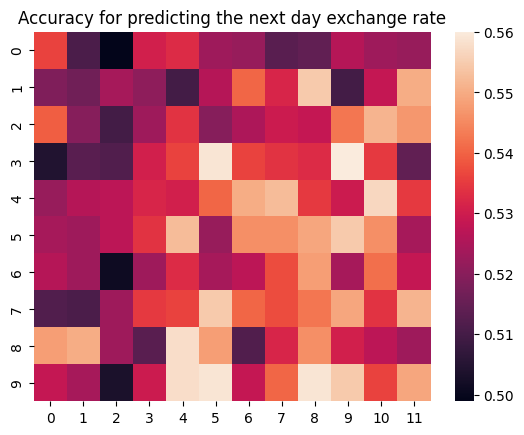

<Figure size 1000x800 with 0 Axes>

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

#
# Setup the X and y train and test data
#
X = eurusd_hist.iloc[:,:27]
y = eurusd_hist['seven_day_move']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


#
# Setup the hyperparameter ranges which will be used to calculate accuracies.
#
max_depth = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
n_estimators = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
accuracy_scores = []

#
# This code was ran twice. Once for next day prediction and 7 days ahead.
# The accuracies were stored in the accuracy_scores list and then transfered to
# final_accuracy_scores_7day and final_accuracy_scores_next_day
#

# for depth in max_depth:
#   accuracies = []
#   for estimators in n_estimators:
#     clf = RandomForestClassifier(max_depth=depth, n_estimators=estimators)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     accuracies.append(accuracy_score(y_test, y_pred))
#   accuracy_scores.append(accuracies)

#
# These are the stored accuracies based on different values of tree depth
# and number of estimators.
#
final_accuracy_scores_7day = [[0.6091703056768559, 0.6408296943231441, 0.6331877729257642, 0.6473799126637555, 0.6255458515283843, 0.6451965065502183, 0.6561135371179039, 0.6550218340611353, 0.6397379912663755, 0.648471615720524, 0.638646288209607, 0.6517467248908297], [0.7085152838427947, 0.7347161572052402, 0.7063318777292577, 0.7358078602620087, 0.7368995633187773, 0.7478165938864629, 0.7620087336244541, 0.7532751091703057, 0.740174672489083, 0.7554585152838428, 0.740174672489083, 0.7489082969432315], [0.7412663755458515, 0.7641921397379913, 0.787117903930131, 0.7893013100436681, 0.7838427947598253, 0.7762008733624454, 0.8067685589519651, 0.8056768558951966, 0.7991266375545851, 0.7947598253275109, 0.7969432314410481, 0.8034934497816594], [0.732532751091703, 0.787117903930131, 0.7980349344978166, 0.8002183406113537, 0.8013100436681223, 0.8078602620087336, 0.824235807860262, 0.8133187772925764, 0.8078602620087336, 0.8198689956331878, 0.8155021834061136, 0.8013100436681223], [0.75764192139738, 0.7641921397379913, 0.7838427947598253, 0.7947598253275109, 0.8231441048034934, 0.8144104803493449, 0.7958515283842795, 0.8209606986899564, 0.8176855895196506, 0.8187772925764192, 0.8296943231441049, 0.8067685589519651], [0.7347161572052402, 0.7914847161572053, 0.7783842794759825, 0.8078602620087336, 0.8034934497816594, 0.8329694323144105, 0.8176855895196506, 0.8296943231441049, 0.8155021834061136, 0.8187772925764192, 0.8100436681222707, 0.8187772925764192], [0.730349344978166, 0.7882096069868996, 0.7991266375545851, 0.7914847161572053, 0.8155021834061136, 0.8089519650655022, 0.8089519650655022, 0.8253275109170306, 0.8133187772925764, 0.8122270742358079, 0.8264192139737991, 0.8133187772925764], [0.75764192139738, 0.7958515283842795, 0.7893013100436681, 0.8067685589519651, 0.8067685589519651, 0.8165938864628821, 0.8209606986899564, 0.8034934497816594, 0.8220524017467249, 0.8133187772925764, 0.8209606986899564, 0.8089519650655022], [0.7543668122270742, 0.7783842794759825, 0.8078602620087336, 0.7980349344978166, 0.8013100436681223, 0.8165938864628821, 0.8013100436681223, 0.8078602620087336, 0.8144104803493449, 0.8111353711790393, 0.8187772925764192, 0.8122270742358079], [0.7510917030567685, 0.769650655021834, 0.8034934497816594, 0.8002183406113537, 0.8307860262008734, 0.8078602620087336, 0.8155021834061136, 0.8220524017467249, 0.8307860262008734, 0.8056768558951966, 0.8122270742358079, 0.8253275109170306]]
final_accuracy_scores_next_day = [[0.5360262008733624, 0.5109170305676856, 0.49890829694323147, 0.5305676855895196, 0.5327510917030568, 0.5229257641921398, 0.5218340611353712, 0.5131004366812227, 0.5141921397379913, 0.5262008733624454, 0.5229257641921398, 0.5218340611353712], [0.5185589519650655, 0.5163755458515283, 0.5240174672489083, 0.5207423580786026, 0.509825327510917, 0.5262008733624454, 0.5403930131004366, 0.5316593886462883, 0.5545851528384279, 0.509825327510917, 0.5283842794759825, 0.5502183406113537], [0.5393013100436681, 0.519650655021834, 0.509825327510917, 0.5229257641921398, 0.5338427947598253, 0.519650655021834, 0.5251091703056768, 0.5294759825327511, 0.5283842794759825, 0.5425764192139738, 0.5513100436681223, 0.5469432314410481], [0.5043668122270742, 0.5131004366812227, 0.5120087336244541, 0.5305676855895196, 0.5360262008733624, 0.5589519650655022, 0.5360262008733624, 0.5338427947598253, 0.5327510917030568, 0.5600436681222707, 0.5349344978165939, 0.5141921397379913], [0.5218340611353712, 0.5262008733624454, 0.527292576419214, 0.5316593886462883, 0.5305676855895196, 0.5403930131004366, 0.5502183406113537, 0.5524017467248908, 0.5349344978165939, 0.5294759825327511, 0.5567685589519651, 0.5349344978165939], [0.5240174672489083, 0.5229257641921398, 0.527292576419214, 0.5338427947598253, 0.5524017467248908, 0.5218340611353712, 0.5458515283842795, 0.5458515283842795, 0.5491266375545851, 0.5545851528384279, 0.5458515283842795, 0.5240174672489083], [0.5262008733624454, 0.5229257641921398, 0.5010917030567685, 0.5229257641921398, 0.5327510917030568, 0.5240174672489083, 0.527292576419214, 0.537117903930131, 0.5480349344978166, 0.5240174672489083, 0.5414847161572053, 0.5283842794759825], [0.5120087336244541, 0.5109170305676856, 0.5229257641921398, 0.5349344978165939, 0.5360262008733624, 0.5545851528384279, 0.5403930131004366, 0.537117903930131, 0.5425764192139738, 0.5491266375545851, 0.5338427947598253, 0.5513100436681223], [0.5480349344978166, 0.5502183406113537, 0.5229257641921398, 0.5131004366812227, 0.5578602620087336, 0.5480349344978166, 0.5120087336244541, 0.5316593886462883, 0.5458515283842795, 0.5305676855895196, 0.527292576419214, 0.5229257641921398], [0.5283842794759825, 0.5240174672489083, 0.5032751091703057, 0.5294759825327511, 0.5578602620087336, 0.5589519650655022, 0.5283842794759825, 0.5403930131004366, 0.5589519650655022, 0.5545851528384279, 0.5360262008733624, 0.5491266375545851]]

#
# Heatmap of accuracies for predicting the exchange rate 7 days ahead
# Based on different max tree depths and number of trees
#
ax = plt.axes()
ax.set_title('Accuracy for predicting the next day exchange rate')
ax.set_xlabel('# of estimators')
ax.set_ylabel('max depth')
ax.set_xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
plt.figure(figsize=(10,8))
sns.heatmap(final_accuracy_scores_next_day, ax=ax)


<Axes: title={'center': 'Accuracy for predicting 7 days ahead'}>

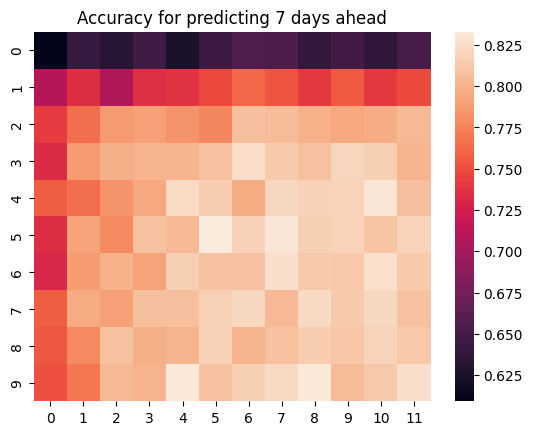

<Figure size 1000x800 with 0 Axes>

In [ ]:
#
# Heatmap of accuracies for predicting the exchange rate 7 days ahead
# Based on different max tree depths and number of trees
#
ax = plt.axes()
ax.set_title('Accuracy for predicting 7 days ahead')
plt.figure(figsize=(10,8))
sns.heatmap(final_accuracy_scores_7day, ax=ax)

### -- - Data normalization, final readiness

In [14]:
# from sklearn.preprocessing import MinMaxScaler

# # Select the columns you want to normalize (excluding target variables)
# feature_columns = ['Close', 'rsi', 'sma_10', 'sma_20', 'cross', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0', '10_yr_yield', '5_yr_yield', 'DXY_Close', 'eur_10_yr_yield', 'us_inf', 'euro_inf', 'inflation_diff']

# # Instantiate the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the dataset (excluding target variables)
# normalized_data = scaler.fit_transform(eurusd_hist[feature_columns])

# # Create a new DataFrame to store the normalized data
# normalized_df = pd.DataFrame(normalized_data, columns=feature_columns, index=eurusd_hist.index)

# # Add the target variables to the normalized_df
# normalized_df['next_day_move'] = eurusd_hist['next_day_move']
# normalized_df['seven_day_move'] = eurusd_hist['seven_day_move']

# # Display the normalized dataset
# normalized_df
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the columns you want to normalize
selected_columns = ['Close', 'rsi', 'sma_10', 'sma_20', 'cross', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0', '10_yr_yield', '5_yr_yield', 'DXY_Close', 'eur_10_yr_yield', 'us_inf', 'euro_inf', 'inflation_diff']

# Fit the scaler on the selected columns and transform the data
scaled_data = scaler.fit_transform(eurusd_hist[selected_columns])

# Replace the original data with the scaled data
eurusd_hist[selected_columns] = scaled_data

eurusd_hist

<ipython-input-14-6a4c0177cf7c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurusd_hist[selected_columns] = scaled_data


,Close,rsi,sma_10,sma_20,cross,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_5_2.0,BBM_5_2.0,...,inflation_diff,close_t-1,close_t-2,close_t-3,close_t-4,close_t-5,next_day_rate,seven_day_rate,next_day_move,seven_day_move
2005-08-18,-0.175948,-0.437499,-0.043974,-0.123069,-0.179605,0.617102,-0.394592,0.775823,-0.118651,-0.068269,...,0.898346,1.227807,1.234995,1.237103,1.244493,1.247303,1.215495,1.223496,0,1
2005-08-19,-0.198147,-0.595846,-0.060172,-0.119450,-0.179605,0.429846,-0.826012,0.711641,-0.160380,-0.112709,...,0.898346,1.218398,1.227807,1.234995,1.237103,1.244493,1.223406,1.221807,1,1
2005-08-22,-0.137648,-0.068857,-0.069148,-0.112942,-0.179605,0.353851,-0.867885,0.644206,-0.155022,-0.133700,...,0.898346,1.215495,1.218398,1.227807,1.234995,1.237103,1.223496,1.234096,1,1
2005-08-23,-0.136962,-0.063112,-0.080133,-0.104551,-0.179605,0.291434,-0.864373,0.577045,-0.132250,-0.151323,...,0.898346,1.223406,1.215495,1.218398,1.227807,1.234995,1.227401,1.249001,1,1
2005-08-24,-0.107102,0.190202,-0.088733,-0.096578,-0.179605,0.276684,-0.731639,0.520193,-0.131118,-0.151946,...,0.898346,1.223496,1.223406,1.215495,1.218398,1.227807,1.230194,1.253306,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-05,-1.111885,1.140609,-1.197440,-1.276475,-0.179605,0.752427,0.829202,0.538853,-1.189002,-1.172300,...,-4.612375,1.091227,1.080334,1.090465,1.084363,1.083952,1.090334,1.105461,0,1
2023-04-06,-1.155294,0.741631,-1.194911,-1.262850,-0.179605,0.763785,0.694381,0.592763,-1.173643,-1.163150,...,-4.612375,1.096011,1.091227,1.080334,1.090465,1.084363,1.092013,1.098660,1,1
2023-04-07,-1.142455,0.823413,-1.188381,-1.249932,-0.179605,0.780263,0.600481,0.639379,-1.172549,-1.160778,...,-4.612375,1.090334,1.096011,1.091227,1.080334,1.090465,1.091358,1.092538,0,1
2023-04-10,-1.147468,0.774693,-1.177989,-1.241078,-0.179605,0.778343,0.475215,0.676265,-1.105257,-1.143883,...,-4.612375,1.092013,1.090334,1.096011,1.091227,1.080334,1.086933,1.097538,0,1


# Carry Trade (interest rate differencial)

In [13]:
euro_yield = euro_10_yr_yield["Yield Percentage"].values
usd_yield = (ten_yr_hist["High"] + ten_yr_hist["Low"]) /2
EURUSD_carry = euro_yield - usd_yield.values  
EUROUSD_carry = pd.DataFrame(EURUSD_carry) 

EURUSD_carry = pd.concat([pd.DataFrame(euro_10_yr_yield["Date"]),EUROUSD_carry], axis=1)  # combine date and difference
EURUSD_carry.rename(columns = {0: "IRD"}, inplace = True) # rename column
EURUSD_carry

KeyError: ignored

**Transforming data...**

In [ ]:
x_ir = EURUSD_carry['IRD'].astype(float)
x_ir = np.array(x_ir).reshape(-1,1)
x_ir
y_fx = y

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x_ir, y_fx)
y_fx_predict = model.predict(x_ir)
print(model.score(x_ir, y_fx))

NameError: ignored

In [ ]:

plt.figure(figsize=(12,6))
plt.scatter(x, y_fx, alpha=0.4)
plt.plot(x, y_fx_predict)
plt.title("Linear Regression: EUR/USD Exchange Rate (1 var: Interest Rate)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.show()

NameError: ignored

<Figure size 1200x600 with 0 Axes>

# US Dollar Index (DXY)



Closing price:
Date
2005-01-03 00:00:00-05:00     81.300003
2005-01-04 00:00:00-05:00     82.570000
2005-01-05 00:00:00-05:00     82.540001
2005-01-06 00:00:00-05:00     83.150002
2005-01-07 00:00:00-05:00     83.610001
                                ...    
2023-04-19 00:00:00-04:00    101.970001
2023-04-20 00:00:00-04:00    101.839996
2023-04-21 00:00:00-04:00    101.820000
2023-04-24 00:00:00-04:00    101.349998
2023-04-25 00:00:00-04:00    101.860001
Name: Close, Length: 4617, dtype: float64

Difference between open and close prices:
Date
2005-01-03 00:00:00-05:00   -0.250000
2005-01-04 00:00:00-05:00   -1.209999
2005-01-05 00:00:00-05:00   -0.050003
2005-01-06 00:00:00-05:00   -0.700005
2005-01-07 00:00:00-05:00   -0.540001
                               ...   
2023-04-19 00:00:00-04:00   -0.260002
2023-04-20 00:00:00-04:00    0.150002
2023-04-21 00:00:00-04:00   -0.019997
2023-04-24 00:00:00-04:00    0.370003
2023-04-25 00:00:00-04:00   -0.599998
Length: 4617, dtype: float64


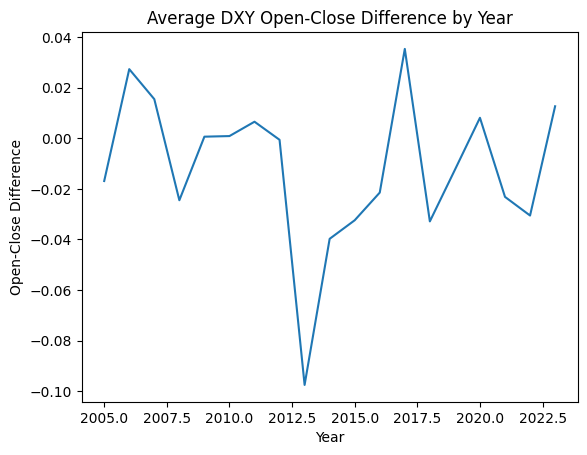

In [12]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

dxy = yf.Ticker("DX-Y.NYB")
end_date = datetime.now().strftime('%Y-%m-%d')
dxy_hist = dxy.history(start='2005-01-03', end=end_date)

# Extract only the closing price
dxy_close = dxy_hist['Close']

# Calculate the difference between the open and close prices
dxy_diff = dxy_hist['Open'] - dxy_hist['Close']

print("Closing price:")
print(dxy_close)  # prints last 5 rows of the closing price data
print("\nDifference between open and close prices:")
print(dxy_diff)  # prints last 5 rows of the difference data

# Calculate the year for each data point
years = dxy_diff.index.year

# Calculate the average difference for each year
yearly_diff = dxy_diff.groupby(years).mean()

# Plot a line chart of the yearly difference data
plt.plot(yearly_diff.index, yearly_diff.values)
plt.title('Average DXY Open-Close Difference by Year')
plt.xlabel('Year')
plt.ylabel('Open-Close Difference')
plt.show()

# FX Project Notes

## Problem
- Many small to medium size businesses in the US need to import products and services from abroad.
    - Ethnic food stores
    - Manufacturers
    - Resellers
    - etc...

- Businesses rely on stable currencies and their exchange rates in order to conduct business.

- Unfortunately, exchange rates can fluctuate a lot throught any given year.
    - War
    - Pandemic
    - Stagnant Economic Growth
    - Government Intervention (interest rates)
    - Banks' appetite for risk
    - etc...

- Businesses want to know if they should pay for imported products / services sooner or later.
    - If the exchange rate goes in favor of the dollar in the future, maybe hold off on purchases until later.
    - If the exchange rate goes against the dollar in the future, make purchases as soon as possible. 
- This allows businesses to save money on purchases.

## Approach
- We want to try to predict the future exchange rate movement (up or down) of the Euro / Dollar pair (EURUSD) by using
    - Technical indicators
        - Moving averages
        - Relative Strength Index (finds potential overbought / oversold areas)
        - MACD (Moving Average Convergence/Divergence) (looks for momentum)
        - Bollinger Bands (indicate trend & deviation from average rate)
        - Previous days' closing rates
    - Macroeconomic indicators
        - Interest rates in the US and Euro zone (reflected through the treasury yield rates)
        - Inflation rates
        - Dollar Index (DXY) (Measure of Dollar's strength against a basket of currencies)

- We want to see if fundamental economic factors play a major role.

- Little background
    - The smallest fractional unit of any given currency is called a pip.
        - For the US Dollar, a pip is the fourth decimal place.
        - For the Japanese Yen, a pip is the second decimal place.
    - Higher interest rates make a given currency more appealing, and vice versa.
    - When the interest rate of the central bank of government A grows in relation to the central bank of government B, the currency of country A tends to strengthen against B, and vice versa.
    - Increase in inflation tends to be followed by an increased interest rates, due to governments trying to curb it, and vice versa.

- Data Collection
    - Yahoo Finance
    - ECB website (European Central Bank)
    - www.usinflationcalculator.com (For historical US inflation data)
    - www.rateinflation.com (For historical Euro area inflation data)

- Data Preparation
    - Data imported via API, online CSV and HTML tables.
    - Formatted into a date index and value columns.
    - Combined into one dataframe.
    - Null values handled by trimming top and bottom rows, as well as forward filling.
    - Added labels for next day's price movement (up/down) and 7 days later (coded as 1 or 0)

- Model Selection
    - Two main models used in forecasting future price movements:
        - Random Forests
        - LSTM (long short-term memory) networks
    - According to online references, LSTM did not provide a significant performance boost over Random Forests
    - We have gone with a Random Forest Classifier
    - A random forest is an ensemble method where multiple decision trees are used with varying features.
    - Each tree can have a different prediction.
    - Majority vote is taken at the end to make the final prediction.

## Evaluation
- We ran the classifier on two labels
    - Next day's close was above or below current day's close.
    - The close 7 days ahead was above or below current day's close.
- Classifier was ran multiple times on two different hyperparameters
    - Max tree depth (5 to 50 in increments of 5)
    - Number of estimators to use (trees) (5 to 60 in increments of 5)
- Around 4500 rows of training data was used.
- Each row represented data for a single day, ranging from August 2005 to April of this year.
- Training and test data was split 80 / 20.


## Result
- First ran the classifier to try to predict next day's movement, whether the exchange rate ended above the current day or below. 
    - There was an accuracy of 50-56%
    - Classifier was only slightly better on average as the max depth and # of trees increased.
    - This is in line with our prediction as there is a lot of daily market noise.
    - We expected an average of 50-53%
    
- However.......
    - When we ran the classifier to predict the movement 7 days ahead compared to the current day's rate, we have seen an accuracy of up to 80%.
    - Confusion matrix showed that there wasn't a big difference in performance between the two classifications.
- What features were mostly responsible for the result?
    - Euro 10 year treasury yield
    - US 5 and 10 year treasury yield
    - MACD
    - Dollar Index (in 11th place out of 27 features)
- It seems that Macroeconomic factors may play a role.

## Problems
- The model did not go through cross validation, the performance may change.
- The inflation rates are released about once per month, so there was no variation within each month, only between months, making it a suboptimal feature.
- Price movement prediction did not take into account what the price does between the current day and 7 days ahead. 
    - Even though the model might accurately predict that the exchange rate went down, the rate could have fluctuated wildly up and down in the mean time.
- Price movement may also have been negligible, anywhere between 5-50 pips, which is not a strong indication of an actual movement.

## Next steps
- Add more macroeconomic indicators.
- Remove any that seem to be unimportant.
- Try to do cross falidation.
- Compare this model to an LSTM model. 
- Try it on another pair of currencies.
- Try to predict movement 5, 10, 14 days in advance.